In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from physicsasr.dataset.create_dataset import Dataset
from physicsasr.features.create_features import Features


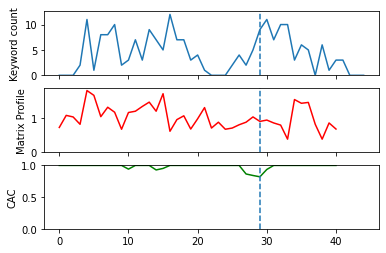

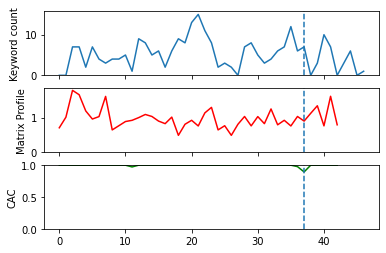

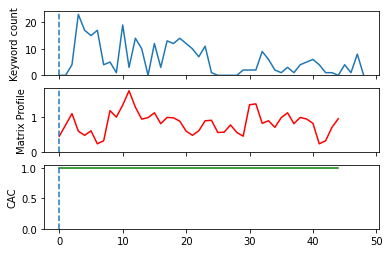

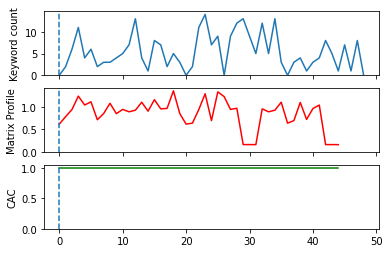

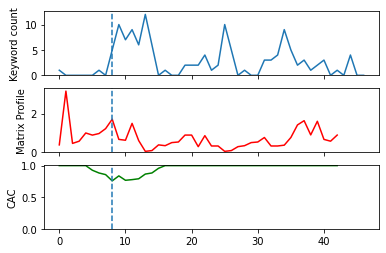

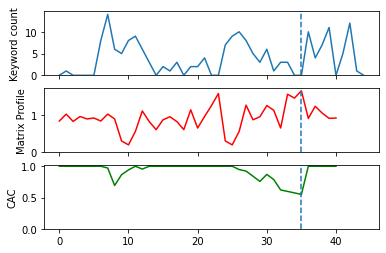

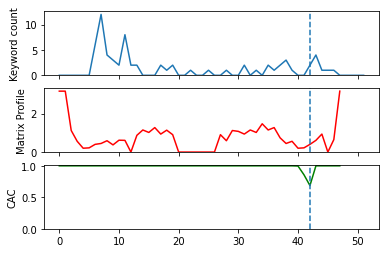

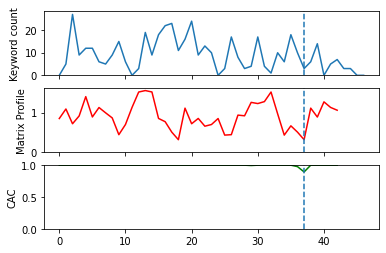

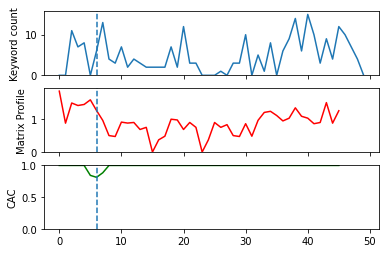

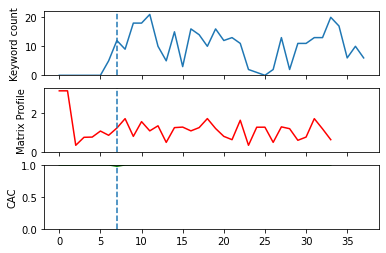

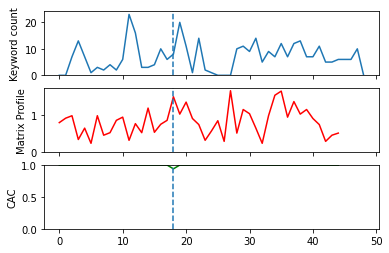

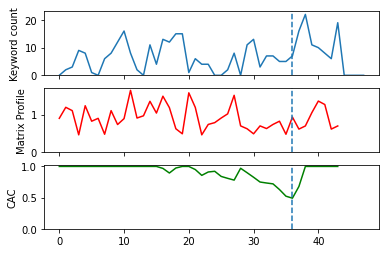

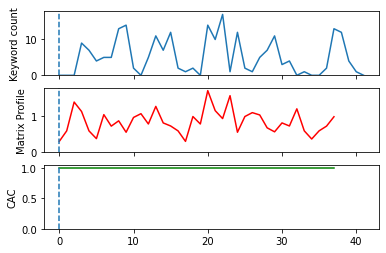

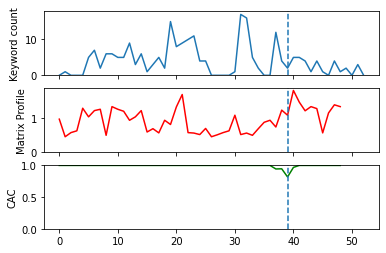

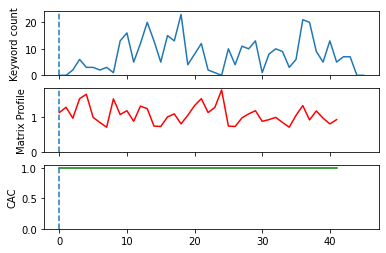

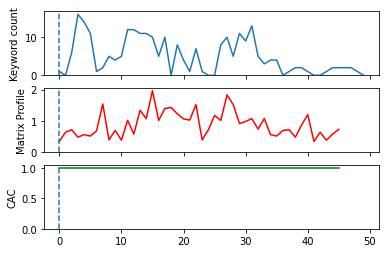

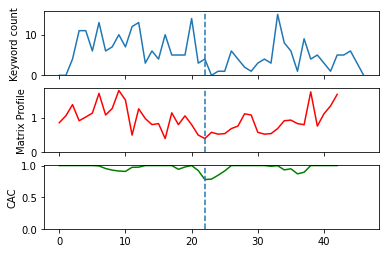

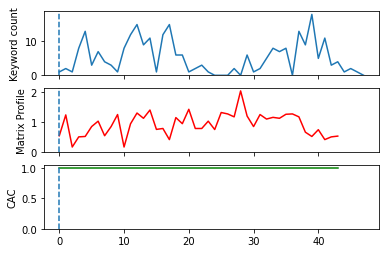

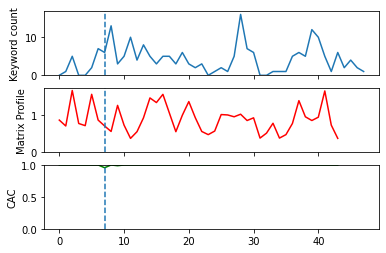

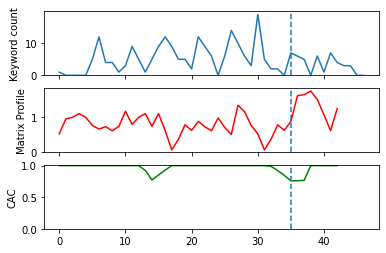

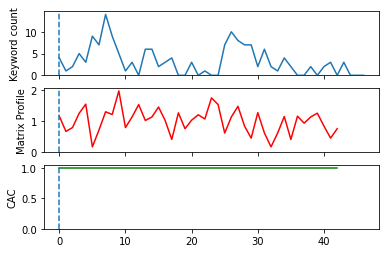

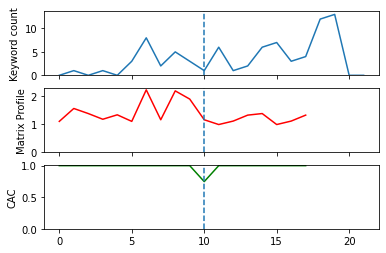

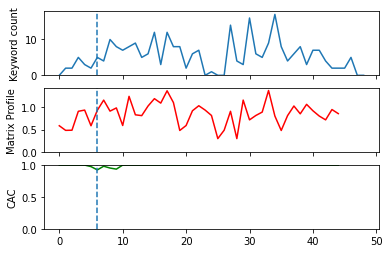

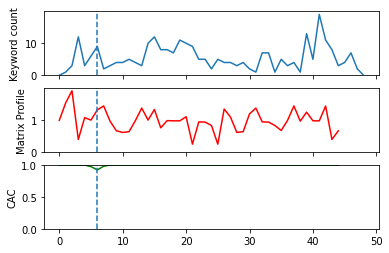

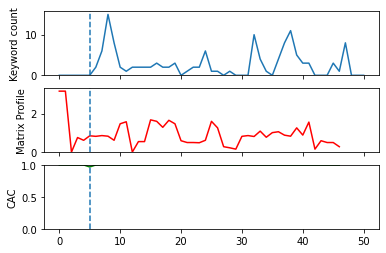

In [2]:
dataset = Dataset("/workspaces/speechrecognition/data/interim/keywords_voikko.json", "/workspaces/speechrecognition/data/interim/transcripts_voikko.json")

keyword_window = 24
m = 5

for transcript in dataset.transcripts:
    features = Features(transcript, dataset.keywords)
    counts = features.compute_keyword_freq(keyword_window)
    mp_adj = features.compute_transcript_mp(keyword_window,m)
    cac, regime_locations = features.compute_cac(keyword_window, m, m,2)

    #%%
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = 'col')

    ax1.plot(np.arange(len(counts)), counts, label="Keyword frequency")
    ax1.axvline(x=regime_locations[0], linestyle="dashed")
    ax1.set_ylabel("Keyword count")
    ax1.set_ylim(ymin=0)

    ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color = "red")
    ax2.axvline(x=regime_locations[0], linestyle="dashed")
    ax2.set_ylabel('Matrix Profile')
    ax2.set_ylim(ymin=0)

    ax3.plot(range(cac.shape[0]), cac, label="Corrected Arc Curve", color="green")
    ax3.axvline(x=regime_locations[0], linestyle="dashed")
    ax3.set_ylabel("CAC")
    ax3.set_ylim(ymin=0)

